<a href="https://colab.research.google.com/github/Sina-Akhavi/bitcoin-timeseries-Forecasting/blob/main/arima_bitcoin_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [2]:
import yfinance as yf
df = yf.download('BTC-USD')


[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()
# df.tail()

# d1 = df['Close']
# d2 = df['Adj Close']
# print(len(df))

# counter = 0
# for i in range(len(df)):
#   if d1[i] == d2[i]:
#     counter += 1

# print(counter)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
# df.info()
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3.391000e+03
mean,14555.827535,14896.256126,14189.326167,14566.876959,14566.876959,1.654824e+10
std,16177.841068,16566.210550,15742.627474,16180.134540,16180.134540,1.908985e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,910.024994,923.448517,896.216492,914.392487,914.392487,1.553355e+08
50%,8232.379883,8393.041992,8031.220215,8243.720703,8243.720703,1.145481e+10
75%,23727.197266,24200.253906,23224.616211,23755.257812,23755.257812,2.687238e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-12-25,43010.574219,43765.093750,42765.769531,43613.140625,43613.140625,21115795370
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032


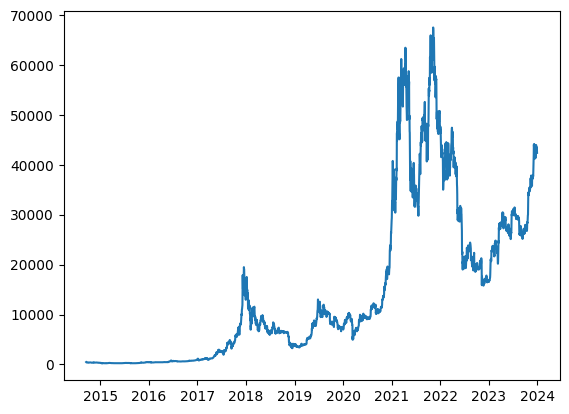

In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.plot(df.index, df['Close'])
plt.show()

In [7]:
num_training_examples = int(0.90 * len(df))
num_training_examples

training_examples = df[:num_training_examples]['Close']
test_examples = df[num_training_examples:]['Close']



# Getting familiar with the dataset

- Training example
- start date: 2014-09-17
- end date: 2023-01-23
- number of training examples: 3051

- Test examples
- start date: 2023-01-24
- ending date: 2023-12-29
- number of testing examples: 340

In [8]:
print('training examples characteristics: \n')
print('number of training examples: ', len(training_examples))
print('start date: ', training_examples.index[0])
print('last date: ', training_examples.index[-1])

training examples characteristics: 

number of training examples:  3051
start date:  2014-09-17 00:00:00
last date:  2023-01-23 00:00:00


In [9]:
print('test examples characteristics: \n')
print('number of test examples: ', len(test_examples))
print('start date: ', test_examples.index[0])
print('last date: ', test_examples.index[-1])

test examples characteristics: 

number of test examples:  340
start date:  2023-01-24 00:00:00
last date:  2023-12-29 00:00:00


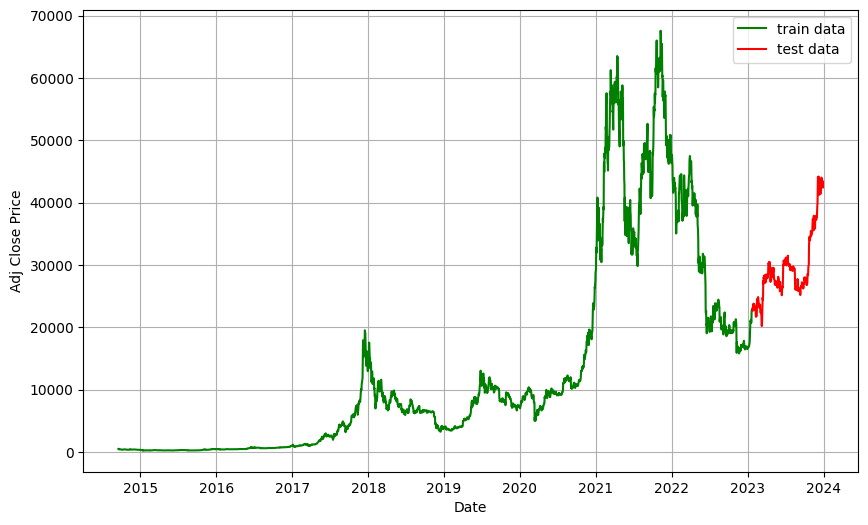

In [10]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.plot(training_examples, 'green', label='train data')
plt.plot(test_examples, 'red', label='test data')
plt.legend()

plt.show()

In [11]:
predictions = list()
history = [x for x in training_examples]
originals = list()

num_tests = len(test_examples)
for i in range(num_tests):

  model = ARIMA(history, order=(4, 1, 0))
  model_fit = model.fit()
  output = model_fit.forecast()

  pred_value = output[0]
  original_value = test_examples[i]
  history.append(original_value)

  print('predicted: ', pred_value, 'expected: ', original_value)

  predictions.append(pred_value)
  originals.append(original_value)

predicted:  22981.808586079143 expected:  22636.46875
predicted:  22646.834910946713 expected:  23117.859375
predicted:  23107.026614772418 expected:  23032.77734375
predicted:  23038.12381608533 expected:  23078.728515625
predicted:  23077.142127353334 expected:  23031.08984375
predicted:  23046.103865131907 expected:  23774.56640625
predicted:  23754.281859823495 expected:  22840.138671875
predicted:  22867.49838777403 expected:  23139.283203125
predicted:  23140.179526470685 expected:  23723.76953125
predicted:  23715.95895091496 expected:  23471.87109375
predicted:  23456.972537940168 expected:  23449.322265625
predicted:  23469.853990725733 expected:  23331.84765625
predicted:  23348.332817603292 expected:  22955.666015625
predicted:  22956.071076097956 expected:  22760.109375
predicted:  22760.200569677687 expected:  23264.291015625
predicted:  23239.630820984512 expected:  22939.3984375
predicted:  22933.993096022645 expected:  21819.0390625
predicted:  21849.339463349363 expect

In [12]:
print('history length=', len(history))
print('predictions length=', len(predictions))
print('originals length=', len(history))

history length= 3391
predictions length= 340
originals length= 3391


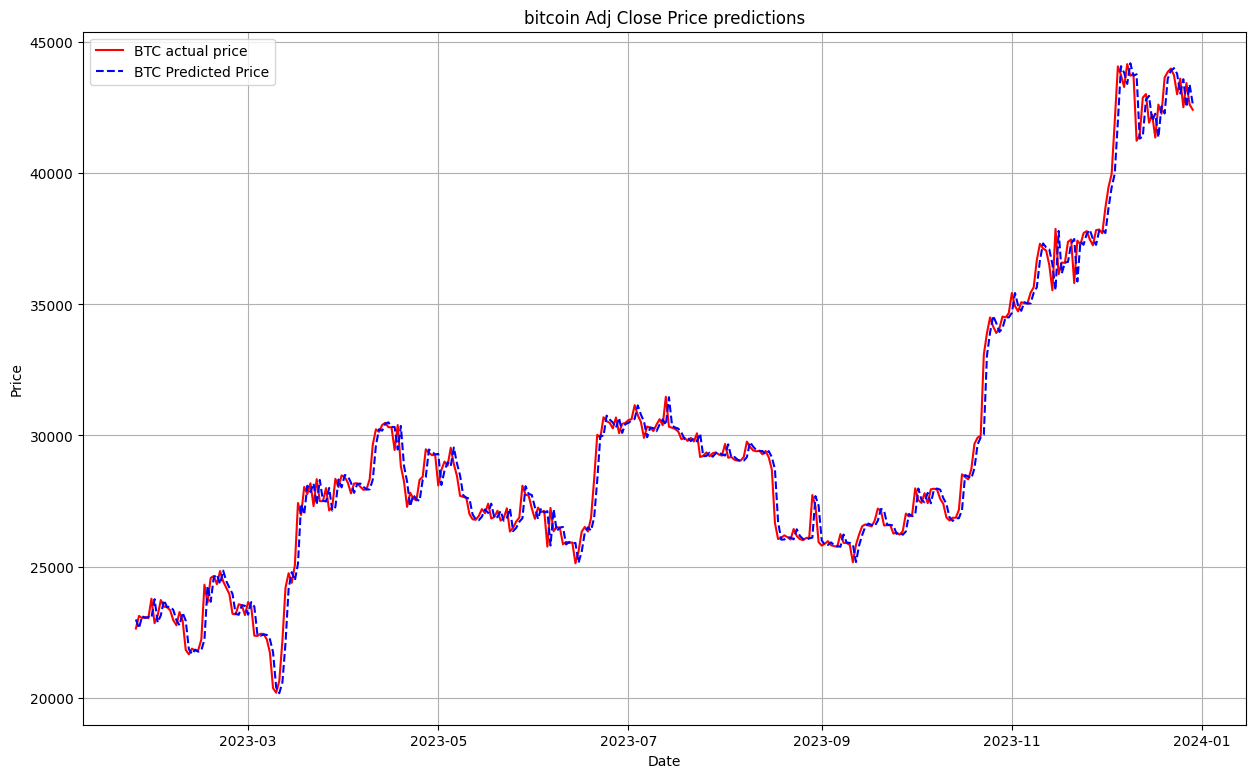

In [13]:
# -------------------- visualizing result --------------------
plt.figure(figsize=(15, 9))
plt.grid(True)
date_range = df[num_training_examples:].index

plt.plot(date_range, originals, color='red', label='BTC actual price')
plt.plot(date_range, predictions, color = 'blue', linestyle='dashed', label='BTC Predicted Price')

plt.title('bitcoin Close Price predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse

mse = mean_squared_error(originals, predictions)
mae = mean_absolute_error(originals, predictions)
r_mse = rmse(originals, predictions)

print('MSE=', mse)
print('MAE=', mae)
print('RMSE=', r_mse)


MSE= 439433.71852827916
MAE= 445.84888769275653
RMSE= 662.8979699231844
